In [1]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import pandas as pd
from google.colab import drive

In [3]:
drive.mount('/content/drive')

#importing the dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/spam.xlsx')

Mounted at /content/drive


In [4]:
df['Class']=df.Class.map({'ham':0, 'spam':1})
df


,Class,Sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
numpy_array = df.to_numpy()
Y=numpy_array[:,0]
print(type(Y), Y.dtype)
X=numpy_array[:,1]
Y=Y.astype('int')
print('X')
print(X)
print('Y')
print(Y)

<class 'numpy.ndarray'> object
X
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
Y
[0 0 1 ... 0 0 0]


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')
# Experiment and see how changing this stop_word parameters
# Which ones give a better model

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.25, random_state = 0)
X_train = [str (item) for item in X_train]
vec.fit(X_train)
vec.vocabulary_

{'ll': 3808,
 'text': 6221,
 'drop': 2291,
 'hi': 3140,
 'mate': 4011,
 'rv': 5367,
 'did': 2139,
 'hav': 3079,
 'nice': 4360,
 'hol': 3175,
 'just': 3547,
 'message': 4079,
 'say': 5427,
 'hello': 3118,
 'coz': 1901,
 'havenåõt': 3082,
 'sent': 5514,
 'ages': 798,
 'started': 5903,
 'driving': 2288,
 'stay': 5914,
 'roads': 5307,
 'rvx': 5368,
 'network': 4344,
 'operator': 4528,
 'service': 5525,
 'free': 2733,
 'visit': 6681,
 '80488': 595,
 'biz': 1249,
 'activate': 741,
 '500': 492,
 'messages': 4081,
 'replying': 5225,
 'word': 6938,
 'terms': 6207,
 'conditions': 1813,
 'www': 6988,
 '07781482378': 29,
 'com': 1759,
 'sexychat': 5539,
 'girls': 2879,
 'waiting': 6729,
 'great': 2968,
 'night': 4367,
 'chatting': 1604,
 'send': 5505,
 'stop': 5947,
 'eighth': 2367,
 'club': 1717,
 'tones': 6369,
 'mix': 4143,
 'tone': 6368,
 'enjoy': 2404,
 'html': 3239,
 'cost': 1877,
 'gbp4': 2836,
 '50': 491,
 'week': 6808,
 'mfl': 4087,
 'good': 2920,
 'morning': 4197,
 'princess': 4939,
 'ka

In [7]:
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '0578', '06', '07008009200', '07099833605', '07123456789', '0721072', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07808247860', '07808726822', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '087016248', '08701752560', '087018728737', '0870241182716', '08702840

In [8]:
X_train_transformed=vec.transform(X_train)
X_train_transformed

<4179x7095 sparse matrix of type '<class 'numpy.int64'>'
	with 32441 stored elements in Compressed Sparse Row format>

In [9]:
X_train=X_train_transformed.toarray()
pd.DataFrame(X_train, columns=vec.get_feature_names())
print(str(X_train))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Multinomial Naive Bayes

Confusion Matrix for BernoulliNB


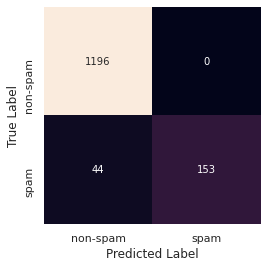

BernoulliNB accuracy =  0.968413496051687


In [10]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)
X_test = [str (item) for item in X_test]
print("Confusion Matrix for BernoulliNB")

Y_pred = bnb.predict(vec.transform(X_test))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
names =[ "non-spam", "spam"]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import accuracy_score
print('BernoulliNB accuracy = ',accuracy_score(Y_test, Y_pred))


Confusion Matrix for MultinomialNB


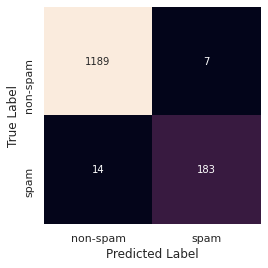

MultinomialNB accuracy =  0.9849246231155779


In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
X_test = [str (item) for item in X_test]
print("Confusion Matrix for MultinomialNB")

Y_pred = mnb.predict(vec.transform(X_test))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
names =[ "non-spam", "spam"]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import accuracy_score
print('MultinomialNB accuracy = ',accuracy_score(Y_test, Y_pred))

In [16]:
test_sms =[str ("This is a sample SMS")]
prediction = mnb.predict(vec.transform(test_sms))
print(prediction)

[0]


Confusion Matrix for GaussianNB


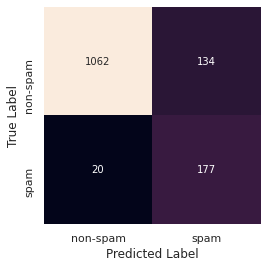

GaussianNB accuracy =  0.8894472361809045


In [12]:
from sklearn.naive_bayes import GaussianNB
mnb=GaussianNB()
mnb.fit(X_train,Y_train)
X_test = [str (item) for item in X_test]

Y_pred = mnb.predict(vec.transform(X_test).todense())
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix for GaussianNB")

names =[ "non-spam", "spam"]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import accuracy_score
print('GaussianNB accuracy = ',accuracy_score(Y_test, Y_pred))

Confusion Matrix for ComplementNB


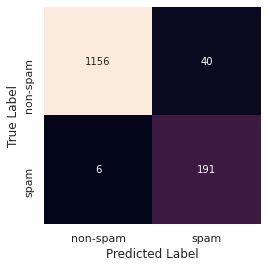

ComplementNB accuracy =  0.9669777458722182


In [13]:
from sklearn.naive_bayes import ComplementNB
mnb=ComplementNB()
mnb.fit(X_train,Y_train)
X_test = [str (item) for item in X_test]

Y_pred = mnb.predict(vec.transform(X_test))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix for ComplementNB")

names =[ "non-spam", "spam"]
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
from sklearn.metrics import accuracy_score
print('ComplementNB accuracy = ',accuracy_score(Y_test, Y_pred))